In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns
import joblib

# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\aa271\AppData\Local\Temp\ipykernel_23520\3475265594.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [2]:
datajh=pd.read_csv("groupedjh.csv")

In [3]:
datacm=pd.read_csv("groupedcm.csv")

In [6]:
datacm

,Time,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,地面层湿度,TVOCs,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Season,Datetime,seconds
0,2022-08-06 15:54:41,2.0,4.0,0.0,1.000,1.2,2.0,0.80,0.00,0.0,...,95.80000,44.016667,15:54:41,15:54,15,Aug,6,Summer,2022-08-06 15:54:41,57281
1,2022-08-06 15:54:48,3.0,2.0,0.0,1.000,0.8,2.0,1.00,6.00,2.0,...,95.80000,66.200000,15:54:48,15:54,15,Aug,6,Summer,2022-08-06 15:54:48,57288
2,2022-08-06 15:54:55,2.0,4.0,0.0,1.000,0.9,1.0,1.00,8.00,0.5,...,95.80000,73.200000,15:54:55,15:54,15,Aug,6,Summer,2022-08-06 15:54:55,57295
3,2022-08-06 15:55:02,2.0,4.0,0.0,1.000,2.1,1.0,1.00,5.00,0.0,...,95.80000,63.600000,15:55:02,15:55,15,Aug,6,Summer,2022-08-06 15:55:02,57302
4,2022-08-06 15:55:09,2.0,3.0,0.0,1.000,1.5,1.0,0.90,5.00,2.0,...,95.80000,59.400000,15:55:09,15:55,15,Aug,6,Summer,2022-08-06 15:55:09,57309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151532,2023-07-25 11:39:05,0.0,0.0,0.0,1.630,0.0,0.0,0.00,0.00,0.0,...,67.66375,6.000000,11:39:05,11:39,11,Jul,25,Summer,2023-07-25 11:39:05,41945
151533,2023-07-25 11:39:12,0.0,0.0,0.0,1.490,0.0,0.0,0.00,0.00,0.0,...,67.79750,5.670000,11:39:12,11:39,11,Jul,25,Summer,2023-07-25 11:39:12,41952
151534,2023-07-25 11:39:19,0.0,0.0,0.0,2.335,0.0,0.0,0.00,0.00,0.0,...,67.93125,7.345000,11:39:19,11:39,11,Jul,25,Summer,2023-07-25 11:39:19,41959
151535,2023-07-25 11:39:26,0.0,0.0,0.0,1.340,0.0,0.0,0.00,0.00,0.0,...,68.06500,7.110000,11:39:26,11:39,11,Jul,25,Summer,2023-07-25 11:39:26,41966


In [5]:
datajh

,Time,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,地面层湿度,TVOCs,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Season,Datetime,seconds
0,2022-08-05 11:25:46,0.000,0.000,0.0,1.000,0.00,1.000,0.00,0.0,1.5,...,52.900000,45.350,11:25:46,11:25,11,Aug,5,Summer,2022-08-05 11:25:46,41146
1,2022-08-05 11:25:53,0.000,0.000,0.0,1.000,0.00,0.000,0.00,0.0,3.0,...,52.900000,56.900,11:25:53,11:25,11,Aug,5,Summer,2022-08-05 11:25:53,41153
2,2022-08-05 11:26:00,0.000,0.000,0.0,1.000,1.45,0.000,0.00,1.0,1.0,...,52.900000,52.650,11:26:00,11:26,11,Aug,5,Summer,2022-08-05 11:26:00,41160
3,2022-08-05 11:26:07,0.000,0.000,0.0,1.000,0.00,0.000,0.00,8.0,2.0,...,52.900000,71.300,11:26:07,11:26,11,Aug,5,Summer,2022-08-05 11:26:07,41167
4,2022-08-05 11:26:14,0.000,0.000,0.0,1.000,1.90,0.000,0.20,0.0,0.0,...,52.900000,57.900,11:26:14,11:26,11,Aug,5,Summer,2022-08-05 11:26:14,41174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149913,2023-07-26 14:28:43,0.620,0.550,0.0,1.530,0.22,0.590,0.50,0.0,0.0,...,77.397778,26.780,14:28:43,14:28,14,Jul,26,Summer,2023-07-26 14:28:43,52123
149914,2023-07-26 14:28:50,0.620,0.480,0.0,1.280,0.22,0.590,0.25,0.0,0.0,...,77.398889,23.000,14:28:50,14:28,14,Jul,26,Summer,2023-07-26 14:28:50,52130
149915,2023-07-26 14:28:57,0.125,0.320,0.0,1.160,0.31,0.435,0.00,0.0,0.0,...,77.400000,26.150,14:28:57,14:28,14,Jul,26,Summer,2023-07-26 14:28:57,52137
149916,2023-07-26 14:29:04,0.000,0.390,0.0,1.050,0.70,0.610,0.00,0.0,0.0,...,77.448750,32.610,14:29:04,14:29,14,Jul,26,Summer,2023-07-26 14:29:04,52144


In [6]:
cl=list(datajh.columns[datajh.columns.get_loc("0.25um"):datajh.columns.get_loc("32.00um")])
cl.append(str("PM1"))
datasoa=datajh[cl]
datasoa=datasoa.diff()
datasoa.columns= ["Δ"+item  for item in cl]

In [7]:
datasoa=pd.concat([datasoa,datajh],axis=1)
datasoa

,Δ0.25um,Δ0.28um,Δ0.30um,Δ0.35um,Δ0.40um,Δ0.45um,Δ0.50um,Δ0.58um,Δ0.65um,Δ0.70um,...,地面层湿度,TVOCs,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Season,Datetime,seconds
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.900000,45.350,11:25:46,11:25,11,Aug,5,Summer,2022-08-05 11:25:46,41146
1,0.070,0.05,0.05,0.000,-0.010,0.020,0.090,-0.010,0.03,0.00,...,52.900000,56.900,11:25:53,11:25,11,Aug,5,Summer,2022-08-05 11:25:53,41153
2,-0.020,-0.09,-0.03,-0.060,-0.010,-0.020,-0.110,0.090,0.00,-0.02,...,52.900000,52.650,11:26:00,11:26,11,Aug,5,Summer,2022-08-05 11:26:00,41160
3,0.015,0.02,-0.07,-0.005,-0.015,0.045,0.105,-0.045,0.00,0.03,...,52.900000,71.300,11:26:07,11:26,11,Aug,5,Summer,2022-08-05 11:26:07,41167
4,0.005,0.03,0.06,-0.005,0.015,-0.075,0.015,0.025,0.00,-0.03,...,52.900000,57.900,11:26:14,11:26,11,Aug,5,Summer,2022-08-05 11:26:14,41174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149913,0.035,-0.02,-0.01,0.020,0.035,-0.015,-0.010,-0.055,0.05,-0.02,...,77.397778,26.780,14:28:43,14:28,14,Jul,26,Summer,2023-07-26 14:28:43,52123
149914,-0.050,-0.01,0.00,-0.010,-0.010,0.020,0.030,-0.060,-0.01,0.02,...,77.398889,23.000,14:28:50,14:28,14,Jul,26,Summer,2023-07-26 14:28:50,52130
149915,0.050,0.04,0.03,0.010,-0.010,0.010,-0.070,0.080,0.00,-0.04,...,77.400000,26.150,14:28:57,14:28,14,Jul,26,Summer,2023-07-26 14:28:57,52137
149916,-0.010,-0.02,0.00,-0.010,-0.010,-0.010,0.060,-0.020,0.00,-0.02,...,77.448750,32.610,14:29:04,14:29,14,Jul,26,Summer,2023-07-26 14:29:04,52144


In [8]:
datasoa=datasoa.groupby("Hour_Min").mean().reset_index()

C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\1422473865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasoa=datasoa.groupby("Hour_Min").mean().reset_index()


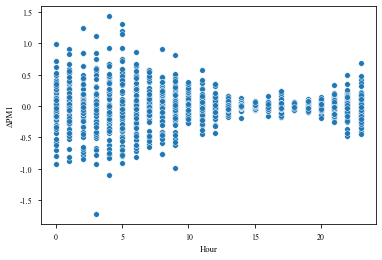

In [9]:
sns.scatterplot(x=datasoa["Hour"],y=datasoa.ΔPM1)
plt.savefig(f"SOA2.svg", bbox_inches='tight')

In [10]:
datasoa

,Hour_Min,Δ0.25um,Δ0.28um,Δ0.30um,Δ0.35um,Δ0.40um,Δ0.45um,Δ0.50um,Δ0.58um,Δ0.65um,...,O3,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,TVOCs,Hour,Day,seconds
0,00:00,0.003657,0.001343,0.005972,-0.005648,0.002176,-0.002407,0.011991,0.019398,0.024028,...,11.984828,13.307590,670.189558,5.192472,18.990538,75.455476,43.042185,0.0,16.916667,29.0
1,00:01,-0.001354,0.002083,-0.000885,0.004792,-0.005677,-0.016406,-0.033438,-0.053021,-0.033958,...,11.895391,13.469413,598.243924,5.819880,19.023686,75.333226,42.896986,0.0,16.916667,88.5
2,00:02,-0.002593,0.000602,0.000231,0.004120,0.004954,0.005046,-0.001991,-0.017130,-0.013889,...,11.690276,13.589766,594.791924,5.594520,18.948588,75.634098,44.499339,0.0,16.916667,148.0
3,00:03,0.003148,-0.000370,-0.001759,-0.009907,-0.009028,-0.020370,-0.008009,0.012824,0.003009,...,12.307066,13.462350,600.022248,5.180319,18.992675,75.411237,42.859200,0.0,16.916667,211.0
4,00:04,0.000625,0.003333,-0.001146,0.005990,0.005365,0.024896,0.018750,0.017500,0.020833,...,12.251254,13.268121,710.846065,5.512466,19.038102,75.428839,37.974542,0.0,16.916667,270.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,0.001435,-0.002037,-0.001343,0.006713,0.008472,0.022222,0.015139,0.019213,0.009907,...,12.005802,13.457246,845.824074,4.554579,18.967755,75.274436,35.301658,23.0,18.416667,86128.0
1436,23:56,-0.000509,-0.000278,0.003148,-0.004398,-0.017500,-0.036898,-0.017593,-0.038565,-0.010231,...,11.595335,13.345712,705.336034,5.161516,18.943200,75.644104,38.351886,23.0,18.416667,86191.0
1437,23:57,0.003437,0.002656,0.000052,0.006302,0.002865,0.001875,-0.011979,-0.011458,-0.007135,...,11.586081,13.355426,587.057292,5.717659,19.026505,75.361858,36.806196,23.0,18.416667,86250.5
1438,23:58,-0.000185,0.002917,0.003102,0.000324,0.005046,0.012407,0.016435,0.032685,0.008565,...,11.597546,13.507283,644.356481,5.480424,19.017865,75.444804,36.599705,23.0,18.416667,86310.0


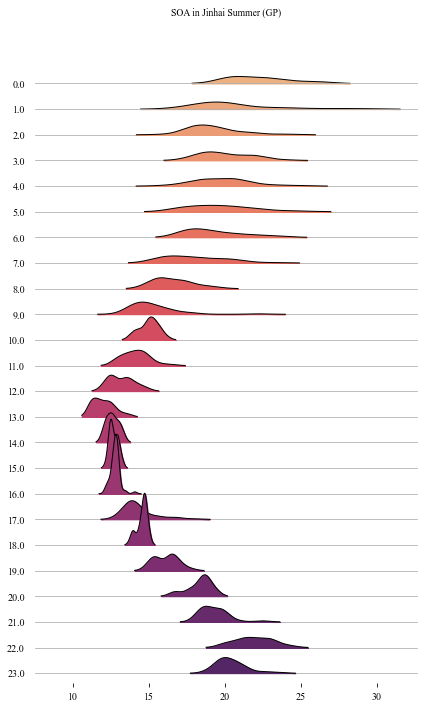

In [11]:
import joypy
# 使用joypy绘制结果
fig, axes = joypy.joyplot(
    datasoa,
    by="Hour",
    column="PM1",
    range_style='own',
    grid="y",
    linewidth=1,
    legend=False,
    figsize=(6,10),
    title="SOA in Jinhai Summer (GP)",
    colormap=sns.color_palette("flare", as_cmap=True)
)
fig.savefig(f"SOA3.svg", bbox_inches='tight')


In [12]:
datasoa=datasoa.groupby("Hour_Min").mean().reset_index()
datasoa

,Hour_Min,Δ0.25um,Δ0.28um,Δ0.30um,Δ0.35um,Δ0.40um,Δ0.45um,Δ0.50um,Δ0.58um,Δ0.65um,...,O3,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,TVOCs,Hour,Day,seconds
0,00:00,0.003657,0.001343,0.005972,-0.005648,0.002176,-0.002407,0.011991,0.019398,0.024028,...,11.984828,13.307590,670.189558,5.192472,18.990538,75.455476,43.042185,0.0,16.916667,29.0
1,00:01,-0.001354,0.002083,-0.000885,0.004792,-0.005677,-0.016406,-0.033438,-0.053021,-0.033958,...,11.895391,13.469413,598.243924,5.819880,19.023686,75.333226,42.896986,0.0,16.916667,88.5
2,00:02,-0.002593,0.000602,0.000231,0.004120,0.004954,0.005046,-0.001991,-0.017130,-0.013889,...,11.690276,13.589766,594.791924,5.594520,18.948588,75.634098,44.499339,0.0,16.916667,148.0
3,00:03,0.003148,-0.000370,-0.001759,-0.009907,-0.009028,-0.020370,-0.008009,0.012824,0.003009,...,12.307066,13.462350,600.022248,5.180319,18.992675,75.411237,42.859200,0.0,16.916667,211.0
4,00:04,0.000625,0.003333,-0.001146,0.005990,0.005365,0.024896,0.018750,0.017500,0.020833,...,12.251254,13.268121,710.846065,5.512466,19.038102,75.428839,37.974542,0.0,16.916667,270.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,0.001435,-0.002037,-0.001343,0.006713,0.008472,0.022222,0.015139,0.019213,0.009907,...,12.005802,13.457246,845.824074,4.554579,18.967755,75.274436,35.301658,23.0,18.416667,86128.0
1436,23:56,-0.000509,-0.000278,0.003148,-0.004398,-0.017500,-0.036898,-0.017593,-0.038565,-0.010231,...,11.595335,13.345712,705.336034,5.161516,18.943200,75.644104,38.351886,23.0,18.416667,86191.0
1437,23:57,0.003437,0.002656,0.000052,0.006302,0.002865,0.001875,-0.011979,-0.011458,-0.007135,...,11.586081,13.355426,587.057292,5.717659,19.026505,75.361858,36.806196,23.0,18.416667,86250.5
1438,23:58,-0.000185,0.002917,0.003102,0.000324,0.005046,0.012407,0.016435,0.032685,0.008565,...,11.597546,13.507283,644.356481,5.480424,19.017865,75.444804,36.599705,23.0,18.416667,86310.0


<AxesSubplot: ylabel='PM1'>

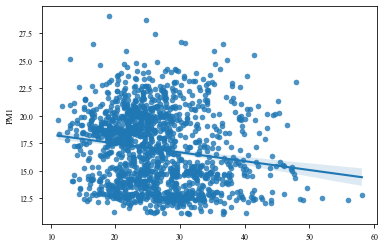

In [13]:
sns.regplot(y=datasoa["PM1"],x=datasoa["异戊二烯浓度"]*(datasoa["O3"]+datasoa["SO2"]+datasoa["NOx"]))

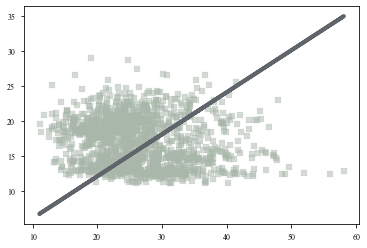

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.robust.robust_linear_model import RLM
from sklearn.preprocessing import StandardScaler

x=datasoa["异戊二烯浓度"]*(datasoa["O3"]+datasoa["SO2"]+datasoa["NOx"])

X = sm.add_constant(x)
model = RLM(datasoa["PM1"], x).fit()

plt.scatter(x, datasoa["PM1"], alpha=0.5, color="#A9B7AA",marker="s")
plt.plot(x, model.fittedvalues, color='#60656C', linewidth=4)

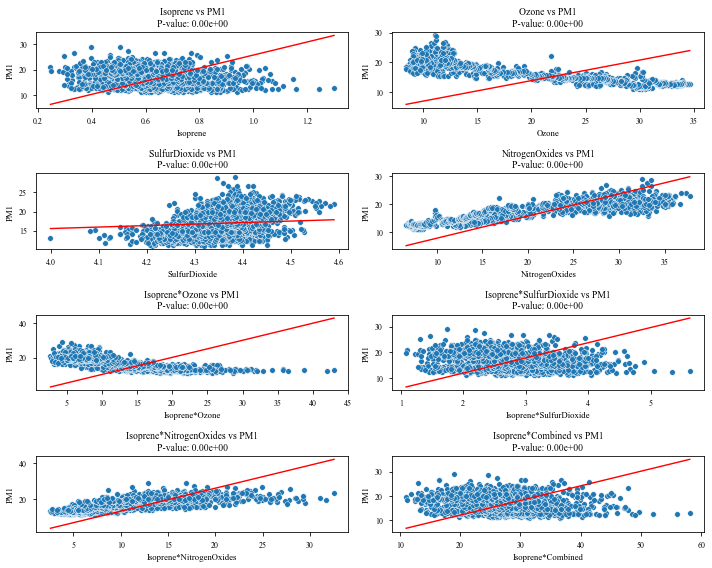

In [15]:
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# 变量名映射为英文
var_mapping = {
    "异戊二烯浓度": "Isoprene",
    "O3": "Ozone",
    "SO2": "SulfurDioxide",
    "NOx": "NitrogenOxides",
    "PM1": "PM1"
}

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# 存储回归结果
regression_results = {}

# 单独变量回归
for i, var in enumerate([v for v in var_mapping.keys() if v != "PM1"]):
    # 数据准备
    X = datasoa[var]
    y = datasoa["PM1"]

    # 回归
    model = sm.RLM(y, X).fit() # 使用异方差稳健的标准误差
    regression_results[var] = model

    # 绘制回归线
    sns.lineplot(x=datasoa[var], y=model.fittedvalues,  ax=axes[i],color='r')
    sns.scatterplot(x=datasoa[var], y=y,  ax=axes[i])
    axes[i].set_title(f'{var_mapping[var]} vs {var_mapping["PM1"]}\nP-value: {model.pvalues[0]:.2e}')
    axes[i].set_xlabel(var_mapping[var])
    axes[i].set_ylabel(var_mapping["PM1"])

# 交互变量回归
for i, (var1, var2) in enumerate([("异戊二烯浓度", "O3"), ("异戊二烯浓度", "SO2"), ("异戊二烯浓度", "NOx")]):
    # 数据准备
    datasoa[f"{var1}*{var2}"] = datasoa[var1] * datasoa[var2]
    X = datasoa[f"{var1}*{var2}"]
    y = datasoa["PM1"]

    # 回归
    model = sm.RLM(y, X).fit()  # 使用异方差稳健的标准误差
    regression_results[f"{var1}*{var2}"] = model

    # 绘制回归线
    ax = axes[len(var_mapping.keys()) - 1 + i]
    sns.lineplot(x=datasoa[f"{var1}*{var2}"], y=model.fittedvalues,  ax=ax,color='r')
    sns.scatterplot(x=datasoa[f"{var1}*{var2}"], y=y,  ax=ax)

    combined_var_name = f'{var_mapping[var1]}*{var_mapping[var2]}'
    ax.set_title(f'{combined_var_name} vs {var_mapping["PM1"]}\nP-value: {model.pvalues[0]:.2e}')
    ax.set_xlabel(combined_var_name)
    ax.set_ylabel(var_mapping["PM1"])

# "异戊二烯浓度"乘以其他变量的线性组合回归
combined_vars = datasoa["O3"] + datasoa["SO2"] + datasoa["NOx"]
datasoa["Isoprene*Combined"] = datasoa["异戊二烯浓度"] * combined_vars

# 回归
X = datasoa["Isoprene*Combined"]
y = datasoa["PM1"]
model = sm.RLM(y, X).fit()  # 使用异方差稳健的标准误差
regression_results["Isoprene*Combined"] = model
# 绘制回归线
ax = axes[-1]  # 选择最后一个subplot
sns.lineplot(x=datasoa["Isoprene*Combined"], y=model.fittedvalues,  ax=ax,color='r')
sns.scatterplot(x=datasoa["Isoprene*Combined"], y=y,  ax=ax)

ax.set_title(f'Isoprene*Combined vs PM1\nP-value: {model.pvalues[0]:.2e}')
ax.set_xlabel('Isoprene*Combined')
ax.set_ylabel('PM1')


# 调整子图间距
plt.tight_layout()
fig.savefig(f"SOA4.png", bbox_inches='tight',dpi=600)

# 显示图表
plt.show()



In [16]:
from sklearn.preprocessing import StandardScaler
data=datajh

# Separating the columns that need to be normalized
cols_to_normalize = data.columns[1:data.columns.get_loc("Hour_Min_Sec")]
data_to_normalize = data[cols_to_normalize]

# Applying MinMaxScaler to normalize the data
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns=cols_to_normalize)

# Merging the normalized data with the columns "Hour_Min_Sec" and the ones after it
datajhsc = pd.concat([normalized_data, data.loc[:, 'Hour_Min_Sec':]], axis=1)


In [17]:
# Normalize data per month
def normalize_data_for_month(month_group):
    scaler = StandardScaler()
    month_group[cols_to_normalize] = scaler.fit_transform(month_group[cols_to_normalize])
    return month_group

# Columns to normalize
cols_to_normalize = datajh.columns[1:datajh.columns.get_loc("Hour_Min_Sec")]

# Group by month and apply normalization
datascmonth = datajh.groupby('Month').apply(normalize_data_for_month)

C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\2728635287.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  datascmonth = datajh.groupby('Month').apply(normalize_data_for_month)


In [18]:
# Separating the columns that need to be log-transformed
cols_to_normalize = datajh.columns[1:datajh.columns.get_loc("Hour_Min_Sec")]
# Set values < 0 to 0 for the columns to be log-transformed
datajh[cols_to_normalize] = datajh[cols_to_normalize].clip(lower=0)
# Apply log transformation to the data
datajh_log_transformed = datajh.copy()
datajh_log_transformed[cols_to_normalize] = np.log(datajh[cols_to_normalize])
# Merging the normalized data with the columns "Hour_Min_Sec" and the ones after it
datajhlog = pd.concat([normalized_data, datajh.loc[:, 'Hour_Min_Sec':]], axis=1)

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [19]:
def remove_outliers_within_group(group,colname):
    """Remove outliers from a group using the IQR method."""
    for col in group.columns:
        if group[col].dtype in colname:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            group = group[(group[col] >= lower_bound) & (group[col] <= upper_bound)]
    return group

# Remove outliers from datajh
datajhcl = datajh.groupby('Hour').apply(lambda group: remove_outliers_within_group(group, ['异戊二烯浓度'])).reset_index(drop=True)

from sklearn.preprocessing import StandardScaler
data=datajhcl

# Separating the columns that need to be normalized
cols_to_normalize = data.columns[1:data.columns.get_loc("Hour_Min_Sec")]
data_to_normalize = data[cols_to_normalize]

# Applying MinMaxScaler to normalize the data
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns=cols_to_normalize)

# Merging the normalized data with the columns "Hour_Min_Sec" and the ones after it
datajhclsc = pd.concat([normalized_data, data.loc[:, 'Hour_Min_Sec':]], axis=1)

# Normalize data per month
def normalize_data_for_month(month_group):
    scaler = StandardScaler()
    month_group[cols_to_normalize] = scaler.fit_transform(month_group[cols_to_normalize])
    return month_group

# Columns to normalize
cols_to_normalize = datajh.columns[1:datajhcl.columns.get_loc("Hour_Min_Sec")]

# Group by month and apply normalization
datajhclscmonth = datajhcl.groupby('Month').apply(normalize_data_for_month)

C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\113226898.py:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  datajhcl = datajh.groupby('Hour').apply(lambda group: remove_outliers_within_group(group, ['异戊二烯浓度'])).reset_index(drop=True)
C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\113226898.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence th

In [20]:
datajh

,Time,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,地面层湿度,TVOCs,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Season,Datetime,seconds
0,2022-08-05 11:25:46,0.000,0.000,0.0,1.000,0.00,1.000,0.00,0.0,1.5,...,52.900000,45.350,11:25:46,11:25,11,Aug,5,Summer,2022-08-05 11:25:46,41146
1,2022-08-05 11:25:53,0.000,0.000,0.0,1.000,0.00,0.000,0.00,0.0,3.0,...,52.900000,56.900,11:25:53,11:25,11,Aug,5,Summer,2022-08-05 11:25:53,41153
2,2022-08-05 11:26:00,0.000,0.000,0.0,1.000,1.45,0.000,0.00,1.0,1.0,...,52.900000,52.650,11:26:00,11:26,11,Aug,5,Summer,2022-08-05 11:26:00,41160
3,2022-08-05 11:26:07,0.000,0.000,0.0,1.000,0.00,0.000,0.00,8.0,2.0,...,52.900000,71.300,11:26:07,11:26,11,Aug,5,Summer,2022-08-05 11:26:07,41167
4,2022-08-05 11:26:14,0.000,0.000,0.0,1.000,1.90,0.000,0.20,0.0,0.0,...,52.900000,57.900,11:26:14,11:26,11,Aug,5,Summer,2022-08-05 11:26:14,41174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149913,2023-07-26 14:28:43,0.620,0.550,0.0,1.530,0.22,0.590,0.50,0.0,0.0,...,77.397778,26.780,14:28:43,14:28,14,Jul,26,Summer,2023-07-26 14:28:43,52123
149914,2023-07-26 14:28:50,0.620,0.480,0.0,1.280,0.22,0.590,0.25,0.0,0.0,...,77.398889,23.000,14:28:50,14:28,14,Jul,26,Summer,2023-07-26 14:28:50,52130
149915,2023-07-26 14:28:57,0.125,0.320,0.0,1.160,0.31,0.435,0.00,0.0,0.0,...,77.400000,26.150,14:28:57,14:28,14,Jul,26,Summer,2023-07-26 14:28:57,52137
149916,2023-07-26 14:29:04,0.000,0.390,0.0,1.050,0.70,0.610,0.00,0.0,0.0,...,77.448750,32.610,14:29:04,14:29,14,Jul,26,Summer,2023-07-26 14:29:04,52144


<AxesSubplot: xlabel='异戊二烯浓度', ylabel='O3'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fu

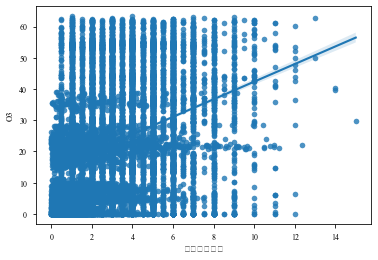

In [9]:
data=datajh[(datajh["Season"]=="Summer") * (datajh["异戊二烯浓度"]!=0)]
sns.regplot(x=data["异戊二烯浓度"],y=data["O3"])

C:\Users\aa271\AppData\Local\Temp\ipykernel_23516\2006839411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='O3', ylabel='NOx'>

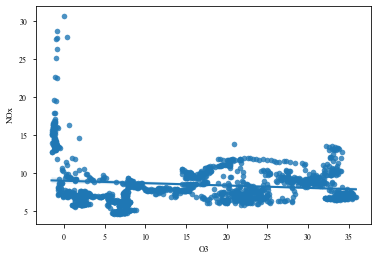

In [13]:
data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
sns.regplot(x=data.O3,y=data.NOx)

C:\Users\aa271\AppData\Local\Temp\ipykernel_23516\1271708416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datacm[(datacm["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='O3', ylabel='NOx'>

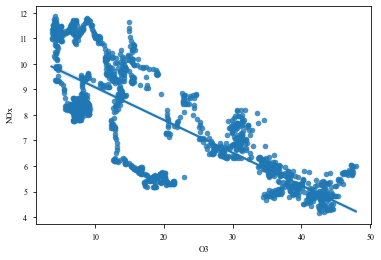

In [14]:
data = datacm[(datacm["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
sns.regplot(x=data.O3,y=data.NOx)

In [246]:
datajh[datajh["异戊二烯浓度"]==0].shape[0]/datajh.shape[0]

0.7742927469858847

C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\1509943851.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


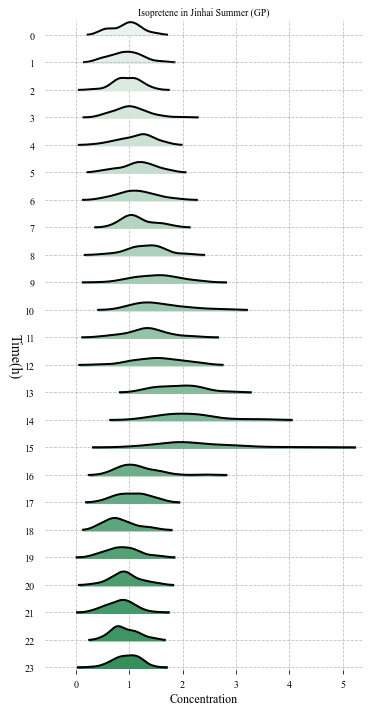

In [42]:
import joypy
from matplotlib import cm, ticker

# 使用您提供的数据创建joyplot
data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
data.Hour=data.Hour.astype(int)
fig, axes = joypy.joyplot(data, by="Hour", column="异戊二烯浓度", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer (GP)",
                          colormap=sns.light_palette("seagreen", as_cmap=True), ylabels= "Concentration")

# 设置 Y 轴标签为 'Concentration' 并调整网格样式
for i,ax in enumerate(axes):
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 设置网格样式

# 设置总的 Y 轴标签
fig.text(-0.018, 0.5, 'Time(h)', va='center', rotation=270, fontsize=14)

# 设置 X 轴标签为 'Time'
axes[-1].set_xlabel('Concentration', fontsize=12)  # 只需在最后一个轴上设置 X 轴标签


plt.tight_layout()
fig.savefig(f"Jinhai Ditribution", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\3822877950.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


Text(0.5, 66.9, 'Concentration')

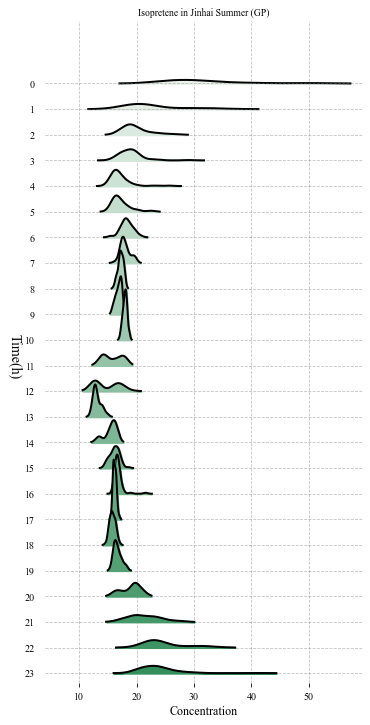

In [22]:
import joypy
from matplotlib import cm, ticker

# 使用您提供的数据创建joyplot
data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
data.Hour=data.Hour.astype(int)
fig, axes = joypy.joyplot(data, by="Hour", column="PM1", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer (GP)",
                          colormap=sns.light_palette("seagreen", as_cmap=True), ylabels= "Concentration")

# 设置 Y 轴标签为 'Concentration' 并调整网格样式
for i,ax in enumerate(axes):
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 设置网格样式

# 设置总的 Y 轴标签
fig.text(-0.018, 0.5, 'Time(h)', va='center', rotation=270, fontsize=14)

# 设置 X 轴标签为 'Time'
axes[-1].set_xlabel('Concentration', fontsize=12)  # 只需在最后一个轴上设置 X 轴标签

C:\Users\aa271\AppData\Local\Temp\ipykernel_29404\743304690.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


Text(0.5, 66.9, 'Concentration')

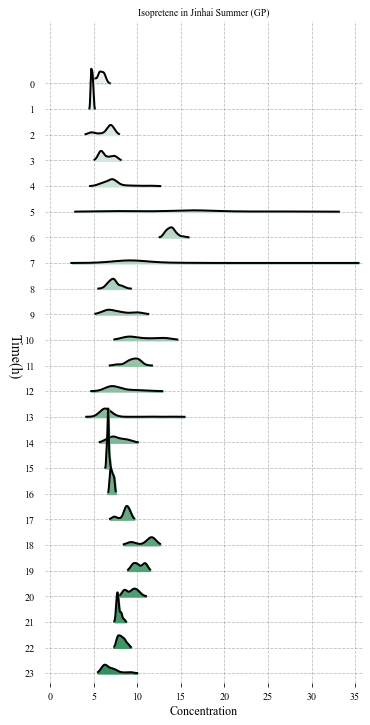

In [23]:
# 使用您提供的数据创建joyplot
data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
data.Hour=data.Hour.astype(int)
fig, axes = joypy.joyplot(data, by="Hour", column="NOx", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer (GP)",
                          colormap=sns.light_palette("seagreen", as_cmap=True), ylabels= "Concentration")

# 设置 Y 轴标签为 'Concentration' 并调整网格样式
for i,ax in enumerate(axes):
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 设置网格样式

# 设置总的 Y 轴标签
fig.text(-0.018, 0.5, 'Time(h)', va='center', rotation=270, fontsize=14)

# 设置 X 轴标签为 'Time'
axes[-1].set_xlabel('Concentration', fontsize=12)  # 只需在最后一个轴上设置 X 轴标签

C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\2903303943.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


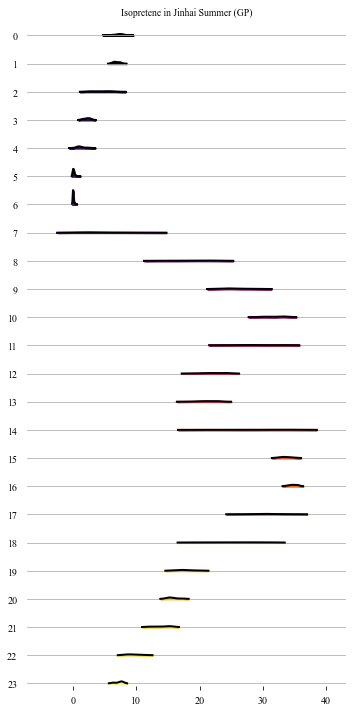

In [53]:
import joypy
from matplotlib import cm, ticker

# 使用您提供的数据创建joyplot
data = datajh[(datajh["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
data.Hour=data.Hour.astype(int)
fig, axes = joypy.joyplot(data, by="Hour", column="O3", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer (GP)",
                          colormap=cm.inferno)  # 更改配色为 inferno

plt.tight_layout()
fig.savefig(f"Jinhai Ditribution O3", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\4285182487.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datacm[(datacm["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()


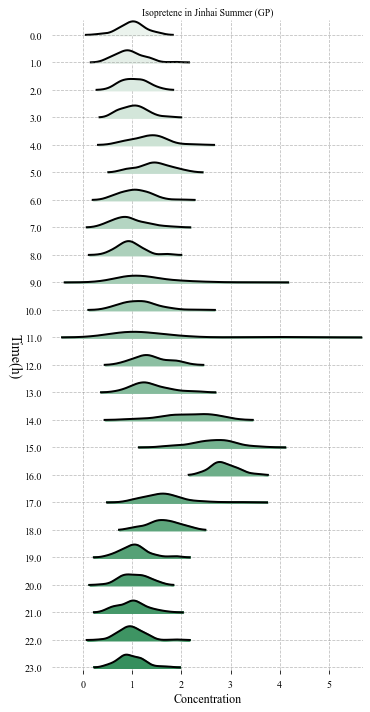

In [54]:
import joypy
from matplotlib import cm, ticker

# 使用您提供的数据创建joyplot
data = datacm[(datacm["Season"]=="Summer")].groupby(["Hour_Min"]).mean().reset_index()
fig, axes = joypy.joyplot(data, by="Hour", column="异戊二烯浓度", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer (GP)",
                          colormap=sns.light_palette("seagreen", as_cmap=True), ylabels= "Concentration")

# 设置 Y 轴标签为 'Concentration' 并调整网格样式
for i,ax in enumerate(axes):
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 设置网格样式

# 设置总的 Y 轴标签
fig.text(-0.018, 0.5, 'Time(h)', va='center', rotation=270, fontsize=14)

# 设置 X 轴标签为 'Time'
axes[-1].set_xlabel('Concentration', fontsize=12)  # 只需在最后一个轴上设置 X 轴标签
plt.tight_layout()
fig.savefig(f"Chongming Ditribution", bbox_inches='tight')
plt.show()

<AxesSubplot: xlabel='异戊二烯浓度', ylabel='Density'>

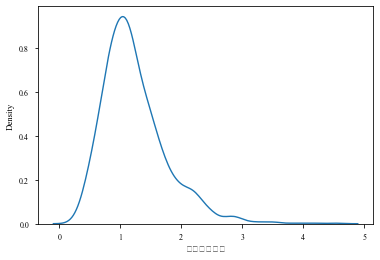

In [125]:
sns.kdeplot(datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index()["异戊二烯浓度"])

<AxesSubplot: xlabel='PM1', ylabel='NOx'>

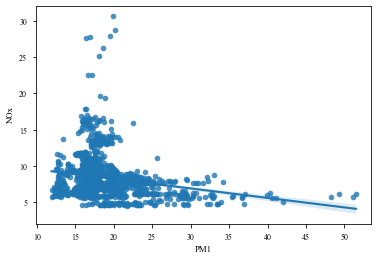

In [121]:
data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index()
sns.regplot(x=data.PM1,y=data.NOx)

<AxesSubplot: xlabel='异戊二烯浓度', ylabel='Density'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fu

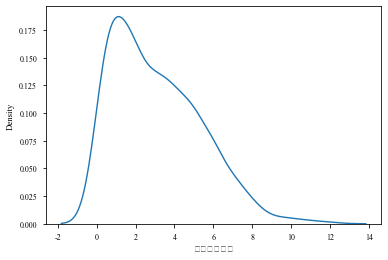

In [57]:
sns.kdeplot(data[data["Hour"]==8]["异戊二烯浓度"])

In [98]:
datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index()

,Hour_Min,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,O3,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,TVOCs,Hour,Day,seconds
0,00:00,0.221296,1.164444,0.000000,1.572037,0.382037,0.352222,0.135741,1.314815,0.074074,...,6.120630,5.428111,1005.666667,-0.324667,28.530000,84.885185,30.700926,0.0,17.666667,29.0
1,00:01,0.276875,1.180417,0.497500,1.458333,0.394583,0.263958,0.199167,1.488333,0.062500,...,6.135229,5.464729,781.416667,-0.313958,28.530000,84.881250,33.346042,0.0,17.666667,88.5
2,00:02,0.207407,0.916852,0.000000,1.326296,0.403519,0.411852,0.167778,0.907407,0.112037,...,6.520963,5.457444,507.000000,-0.293148,28.535556,84.885187,30.940926,0.0,17.666667,148.0
3,00:03,0.144074,0.689815,0.471111,1.468889,0.380000,0.414815,0.270370,1.177037,0.000000,...,7.221222,5.441000,518.111111,-0.275852,28.543704,84.918520,31.062222,0.0,17.666667,211.0
4,00:04,0.217917,0.852500,0.243750,1.036667,0.247708,0.324167,0.155833,0.979167,0.137917,...,7.034292,5.569229,607.562500,-0.615479,28.546667,84.952083,30.756042,0.0,17.666667,270.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,0.186667,0.913704,0.139630,1.254074,0.473889,0.350000,0.146667,1.020185,0.055556,...,6.436037,5.509556,905.666667,-0.329296,28.556296,84.518519,30.125741,23.0,16.666667,86128.0
1436,23:56,0.257222,0.956852,0.079630,1.082037,0.323704,0.198333,0.186481,0.811852,0.037037,...,6.614815,5.578815,786.222222,-0.334630,28.553333,84.514815,29.394259,23.0,16.666667,86191.0
1437,23:57,0.069792,0.713333,0.127500,1.365417,0.433542,0.314167,0.165833,0.806250,0.020833,...,6.473271,5.588875,770.666667,-0.338688,28.553333,84.575002,27.723750,23.0,16.666667,86250.5
1438,23:58,0.340185,0.965370,0.267037,1.237593,0.486296,0.473148,0.207222,1.100000,0.148148,...,6.383037,5.555444,901.222222,-0.335741,28.555185,84.596298,31.292778,23.0,16.666667,86310.0


Text(0.5, 0.98, 'My Title')

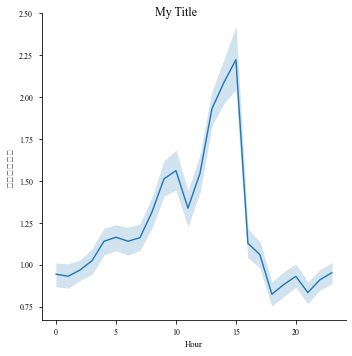

In [105]:
# Plot the lines on two facets

g = sns.relplot(x="Hour", y="异戊二烯浓度",facet_kws=dict(sharex=False),
            kind="line", legend="full", data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index())

g.fig.suptitle("My Title")


<AxesSubplot: xlabel='Hour', ylabel='异戊二烯浓度'>

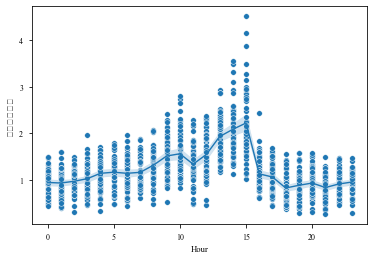

In [113]:
sns.lineplot(x="Hour", y="异戊二烯浓度",data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index())
sns.scatterplot(x="Hour", y="异戊二烯浓度",data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index())

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects

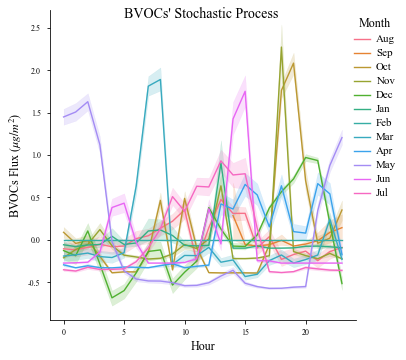

In [16]:
import seaborn as sns

# Plot the lines on two facets
g = sns.relplot(x="Hour", y="异戊二烯浓度",
                hue="Month", facet_kws=dict(sharex=False),
                kind="line", legend="full", data=datascmonth)

# Set the title
g.fig.suptitle("BVOCs' Stochastic Process",fontsize=14)

# Set the y-axis label
g.axes[0, 0].set_ylabel("BVOCs Flux ($μg/m^2$)",fontsize=12)
g.axes[0, 0].set_xlabel("Hour",fontsize=12)

# Adjust the legend
leg = g._legend
leg.set_bbox_to_anchor([1, 0.7])  # change the values here to move the legend box
plt.setp(g._legend.get_texts(), fontsize='11')  # 设置图例文字大小
plt.setp(g._legend.get_title(), fontsize='12')  # 设置图例标题大小

plt.savefig(f"BVOCs' Stochastic Process.svg", bbox_inches='tight')

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.draw()
C:\Users\aa271\PycharmProjects

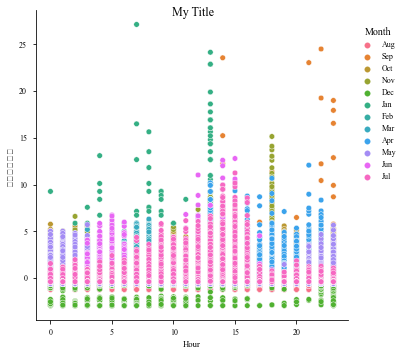

In [62]:
# Plot the lines on two facets

g = sns.relplot(x="Hour", y="异戊二烯浓度",
            hue="Month",facet_kws=dict(sharex=False),
            kind="scatter", legend="full", data=datascmonth)

g.fig.suptitle("My Title")

leg = g._legend
leg.set_bbox_to_anchor([1,0.7])  # change the values here to move the legend box
# I am not using loc in this example

In [67]:
from scipy.stats import norm, expon, gamma, lognorm, beta, kstest
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# List of distributions to test
distributions = [norm, expon, gamma, lognorm, beta]

def best_fit_distribution(data):
    """Find best fit distribution for the given data."""
    best_distribution = None
    best_sse = np.inf
    best_params = None

    for distribution in distributions:
        try:
            # Get parameters of the distribution
            params = distribution.fit(data)

            # Compute the SSE
            sse = np.sum((data - distribution(*params).rvs(size=len(data)))**2)

            # Find the best distribution based on SSE
            if sse < best_sse:
                best_distribution = distribution
                best_sse = sse
                best_params = params

        except Exception as e:
            pass

    return (best_distribution.name, best_params)

data=datajh[(datajh["Season"]=="Summer") * (datajh["异戊二烯浓度"]!=0)].groupby("Hour_Min").mean()
# Group data by hour
grouped_by_hour = data.groupby('Hour')

# Find best fit distribution for each hour
results = {}
for hour, group in grouped_by_hour:
    dist_name, params = best_fit_distribution(group['异戊二烯浓度'])
    results[hour] = (dist_name, params)

results_df = pd.DataFrame(results).T
results_df.columns = ["Best Distribution", "Parameters"]
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Hour'}, inplace=True)
results_df

,Hour,Best Distribution,Parameters
0,0.0,gamma,"(13.394961414067103, 0.7642393327533044, 0.205..."
1,1.0,norm,"(3.508627380952381, 0.750731538104265)"
2,2.0,lognorm,"(0.008551684805366472, -86.78059014114896, 90...."
3,3.0,lognorm,"(0.1112813633697667, -3.454347165802206, 6.694..."
4,4.0,gamma,"(18.680447054983627, -0.11887412983626838, 0.1..."
5,5.0,beta,"(5.5767393680543655, 9.205003789789608, 0.8446..."
6,6.0,beta,"(34.08779220450394, 80374655.05870542, -1.0831..."
7,7.0,lognorm,"(0.2419677921953746, -0.06590991970574395, 3.2..."
8,8.0,norm,"(3.161253035159285, 0.6782138992093277)"
9,9.0,gamma,"(51.69799298226482, -2.1524303467506005, 0.104..."


In [96]:
def remove_outliers_using_iqr(data):
    """Remove outliers from the data using IQR."""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data >= lower_bound) & (data <= upper_bound)]

# Group data by hour
grouped_by_hour = datajhsc.groupby('Hour_Min')

# Find best fit distribution for each hour, after removing outliers
results = {}
for hour, group in grouped_by_hour:
    # Remove outliers
    cleaned_data = remove_outliers_using_iqr(group['异戊二烯浓度'])

    # Find the best fit distribution for cleaned data
    dist_name, params = best_fit_distribution(cleaned_data)
    results[hour] = (dist_name, params)

results_df = pd.DataFrame(results).T
results_df.columns = ["Best Distribution", "Parameters"]
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Hour'}, inplace=True)
results_df

,Hour,Best Distribution,Parameters
0,0,norm,"(-0.2904531364975048, 0.0)"
1,1,norm,"(-0.2904531364975048, 0.0)"
2,2,norm,"(-0.2904531364975048, 0.0)"
3,3,norm,"(-0.2904531364975048, 0.0)"
4,4,gamma,"(1089.7131414070238, -0.2904531364975049, 1.01..."
5,5,gamma,"(1388.965354848077, -0.2904531364975049, 7.961..."
6,6,norm,"(-0.2904531364975048, 0.0)"
7,7,norm,"(-0.2904531364975048, 0.0)"
8,8,gamma,"(1089.7131414070238, -0.2904531364975049, 1.01..."
9,9,gamma,"(1454.4839552340604, -0.2904531364975049, 7.62..."


In [4]:
from scipy.stats import norm, expon, gamma, lognorm, beta, kstest
from scipy.stats import probplot, shapiro, anderson, kstest

# Function to get normal distribution parameters and test for normality
def normal_distribution_fit_and_test(data):
    # Fit normal distribution and get parameters
    params = norm.fit(data)

    # Perform Shapiro-Wilk test
    _, p_value = shapiro(data)

    # Check if data is normally distributed based on p-value
    is_normal = True if p_value > 0.05 else False

    return params, p_value, is_normal

# Group data by hour
data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()
grouped_by_hour = data.groupby('Hour')

# Get normal distribution parameters and test for normality for each hour
normality_results = {}
for hour, group in grouped_by_hour:
    params, p_value, is_normal = normal_distribution_fit_and_test(group['异戊二烯浓度'])
    normality_results[hour] = (params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

normality_df = pd.DataFrame(normality_results).T
normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
normality_df.reset_index(inplace=True)
normality_df.rename(columns={'index': 'Hour'}, inplace=True)
normality_df

C:\Users\aa271\AppData\Local\Temp\ipykernel_10376\944585485.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()


,Hour,Mean,Standard Deviation,P-Value,Is Normal
0,0.0,0.945848,0.264721,0.109516,True
1,1.0,0.933328,0.283671,0.603525,True
2,2.0,0.970541,0.238164,0.81277,True
3,3.0,1.026252,0.299194,0.418038,True
4,4.0,1.142082,0.310944,0.235605,True
5,5.0,1.165675,0.319712,0.275868,True
6,6.0,1.142301,0.336252,0.890598,True
7,7.0,1.163111,0.292649,0.013747,False
8,8.0,1.31641,0.328101,0.635181,True
9,9.0,1.513905,0.411373,0.9618,True


In [5]:
datap=datajh[(datajh["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
datap["SD"]=normality_df["Standard Deviation"].astype(float)

C:\Users\aa271\AppData\Local\Temp\ipykernel_10376\2024999229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datap=datajh[(datajh["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_10376\2024999229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datap=datajh[(datajh["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()


<AxesSubplot: xlabel='异戊二烯浓度', ylabel='SD'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fu

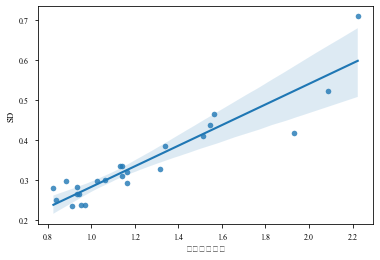

In [9]:
sns.regplot(x=datap["异戊二烯浓度"],y=datap["SD"])

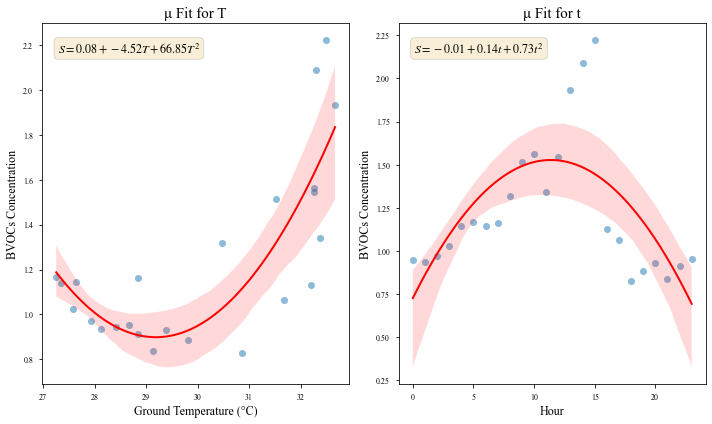

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 为 T 和 S 进行二次拟合
coeff_T = np.polyfit(datap['地面层温度'], datap['异戊二烯浓度'], 2)
poly_T = np.poly1d(coeff_T)

# 为 t 和 S 进行二次拟合
coeff_t = np.polyfit(datap['Hour'], datap['异戊二烯浓度'], 2)
poly_t = np.poly1d(coeff_t)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 为 T 和 S 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['异戊二烯浓度'], order=2, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('μ Fit for T', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T[2]:.2f} + {poly_T[1]:.2f}T + {poly_T[0]:.2f}T^2$', transform=ax[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_xlabel("Ground Temperature (°C)", fontsize=12)  # 假设地面层温度的单位是°C
ax[0].set_ylabel("BVOCs Concentration", fontsize=12)

# 为 t 和 S 创建回归图
sns.regplot(x=datap['Hour'], y=datap['异戊二烯浓度'], order=2, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[1].set_title('μ Fit for t', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_t[2]:.2f} + {poly_t[1]:.2f}t + {poly_t[0]:.2f}t^2$', transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1].set_xlabel("Hour", fontsize=12)  # 假设地面层温度的单位是°C
ax[1].set_ylabel("BVOCs Concentration", fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(f"MEAN.svg", bbox_inches='tight')
plt.show()

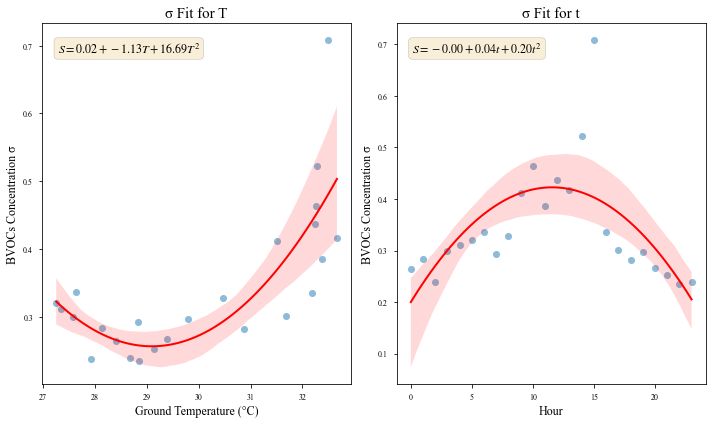

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 为 T 和 S 进行二次拟合
coeff_T2 = np.polyfit(datap['地面层温度'], datap['SD'], 2)
poly_T = np.poly1d(coeff_T2)

# 为 t 和 S 进行二次拟合
coeff_t2 = np.polyfit(datap['Hour'], datap['SD'], 2)
poly_t = np.poly1d(coeff_t2)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 为 T 和 S 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['SD'], order=2, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('σ Fit for T', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T[2]:.2f} + {poly_T[1]:.2f}T + {poly_T[0]:.2f}T^2$', transform=ax[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_xlabel("Ground Temperature (°C)", fontsize=12)  # 假设地面层温度的单位是°C
ax[0].set_ylabel("BVOCs Concentration σ", fontsize=12)

# 为 t 和 S 创建回归图
sns.regplot(x=datap['Hour'], y=datap['SD'], order=2, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[1].set_title('σ Fit for t', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_t[2]:.2f} + {poly_t[1]:.2f}t + {poly_t[0]:.2f}t^2$', transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1].set_xlabel("Hour", fontsize=12)  # 假设地面层温度的单位是°C
ax[1].set_ylabel("BVOCs Concentration σ", fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(f"SD.svg", bbox_inches='tight')
plt.show()

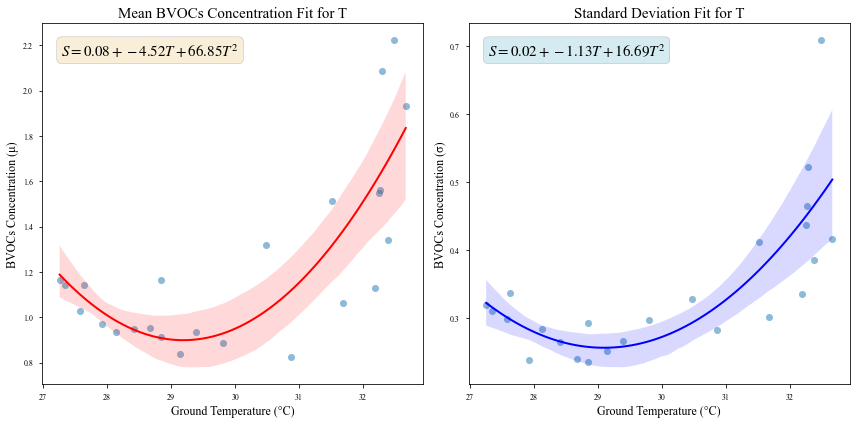

In [61]:

# 为 T 和 μ 进行二次拟合
coeff_T_mean = np.polyfit(datap['地面层温度'], datap['异戊二烯浓度'], 2)
poly_T_mean = np.poly1d(coeff_T_mean)

# 为 T 和 σ 进行二次拟合
coeff_T_sd = np.polyfit(datap['地面层温度'], datap['SD'], 2)
poly_T_sd = np.poly1d(coeff_T_sd)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 为 T 和 μ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['异戊二烯浓度'], order=2, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('Mean BVOCs Concentration Fit for T', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T_mean[2]:.2f} + {poly_T_mean[1]:.2f}T + {poly_T_mean[0]:.2f}T^2$', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[0].set_ylabel("BVOCs Concentration (μ)", fontsize=12)

# 为 T 和 σ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['SD'], order=2, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'blue', 'lw':2})
ax[1].set_title('Standard Deviation Fit for T', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_T_sd[2]:.2f} + {poly_T_sd[1]:.2f}T + {poly_T_sd[0]:.2f}T^2$', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax[1].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[1].set_ylabel("BVOCs Concentration (σ)", fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(f"拟合.svg", bbox_inches='tight')
plt.show()

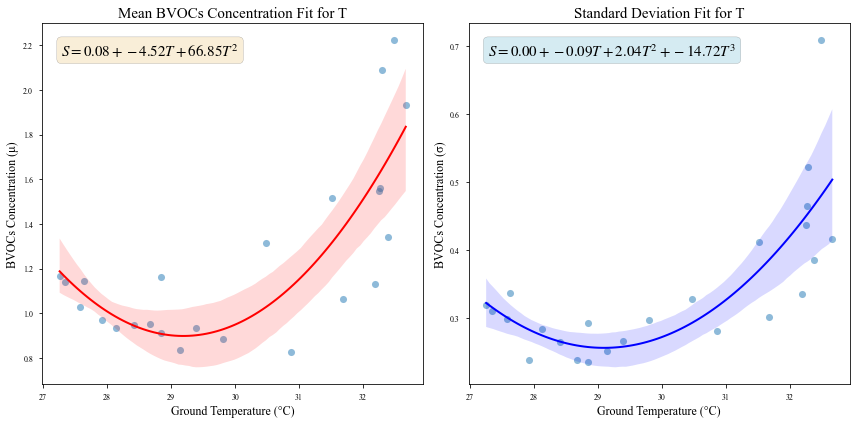

In [6]:

# 为 T 和 μ 进行二次拟合
coeff_T_mean = np.polyfit(datap['地面层温度'], datap['异戊二烯浓度'], 2)
poly_T_mean = np.poly1d(coeff_T_mean)

# 为 T 和 σ 进行二次拟合
coeff_T_sd = np.polyfit(datap['地面层温度'], datap['SD'], 3)
poly_T_sd = np.poly1d(coeff_T_sd)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 为 T 和 μ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['异戊二烯浓度'], order=2, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('Mean BVOCs Concentration Fit for T', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T_mean[2]:.2f} + {poly_T_mean[1]:.2f}T + {poly_T_mean[0]:.2f}T^2$', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[0].set_ylabel("BVOCs Concentration (μ)", fontsize=12)

# 为 T 和 σ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['SD'], order=2, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'blue', 'lw':2})
ax[1].set_title('Standard Deviation Fit for T', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_T_sd[3]:.2f} + {poly_T_sd[2]:.2f}T + {poly_T_sd[1]:.2f}T^2+ {poly_T_sd[0]:.2f}T^3$', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax[1].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[1].set_ylabel("BVOCs Concentration (σ)", fontsize=12)

# 显示图形
plt.tight_layout()
# plt.savefig(f"拟合.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\3163339650.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datacm[(datacm["Season"]=="Summer")].groupby("Hour_Min").mean()
C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\3163339650.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datap=datacm[(datacm["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_29312\3163339650.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will

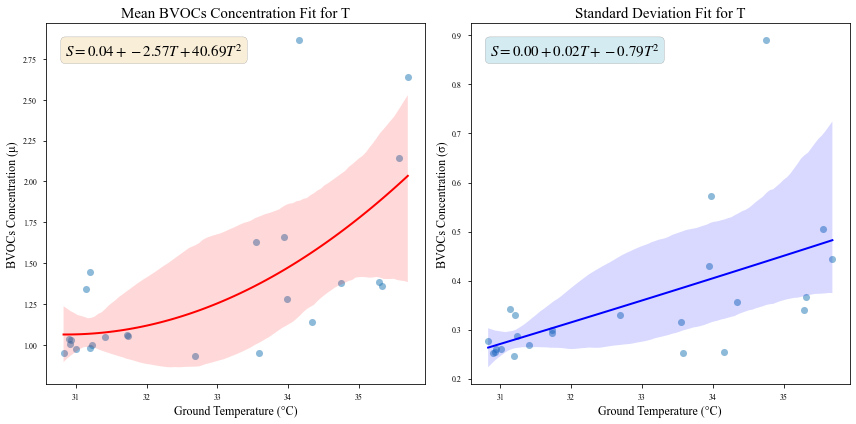

In [49]:
from scipy.stats import norm, expon, gamma, lognorm, beta, kstest
from scipy.stats import probplot, shapiro, anderson, kstest

# Function to get normal distribution parameters and test for normality
def normal_distribution_fit_and_test(data):
    # Fit normal distribution and get parameters
    params = norm.fit(data)

    # Perform Shapiro-Wilk test
    _, p_value = shapiro(data)

    # Check if data is normally distributed based on p-value
    is_normal = True if p_value > 0.05 else False

    return params, p_value, is_normal

# Group data by hour
data=datacm[(datacm["Season"]=="Summer")].groupby("Hour_Min").mean()
grouped_by_hour = data.groupby('Hour')

# Get normal distribution parameters and test for normality for each hour
normality_results = {}
for hour, group in grouped_by_hour:
    params, p_value, is_normal = normal_distribution_fit_and_test(group['异戊二烯浓度'])
    normality_results[hour] = (params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

normality_df = pd.DataFrame(normality_results).T
normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
normality_df.reset_index(inplace=True)
normality_df.rename(columns={'index': 'Hour'}, inplace=True)

datap=datacm[(datacm["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
datap["SD"]=normality_df["Standard Deviation"].astype(float)



# 为 T 和 μ 进行二次拟合
coeff_T_mean = np.polyfit(datap['地面层温度'], datap['异戊二烯浓度'], 2)
poly_T_mean = np.poly1d(coeff_T_mean)

# 为 T 和 σ 进行二次拟合
coeff_T_sd = np.polyfit(datap['地面层温度'], datap['SD'], 2)
poly_T_sd = np.poly1d(coeff_T_sd)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 为 T 和 μ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['异戊二烯浓度'], order=2, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('Mean BVOCs Concentration Fit for T', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T_mean[2]:.2f} + {poly_T_mean[1]:.2f}T + {poly_T_mean[0]:.2f}T^2$', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[0].set_ylabel("BVOCs Concentration (μ)", fontsize=12)

# 为 T 和 σ 创建回归图
sns.regplot(x=datap['地面层温度'], y=datap['SD'], order=2, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'blue', 'lw':2})
ax[1].set_title('Standard Deviation Fit for T', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_T_sd[2]:.2f} + {poly_T_sd[1]:.2f}T + {poly_T_sd[0]:.2f}T^2$', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax[1].set_xlabel("Ground Temperature (°C)", fontsize=12)
ax[1].set_ylabel("BVOCs Concentration (σ)", fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(f"拟合CM.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_23516\111363244.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()
C:\Users\aa271\AppData\Local\Temp\ipykernel_23516\111363244.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datap=datajh[(datajh["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_23516\111363244.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will de

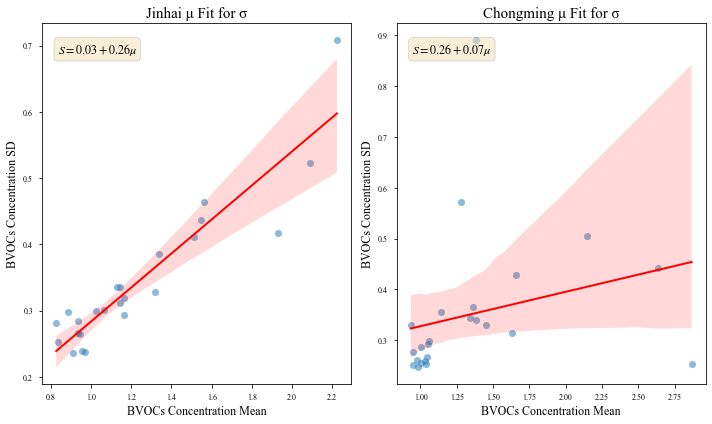

In [11]:
# Function to get normal distribution parameters and test for normality
def normal_distribution_fit_and_test(data):
    # Fit normal distribution and get parameters
    params = norm.fit(data)

    # Perform Shapiro-Wilk test
    _, p_value = shapiro(data)

    # Check if data is normally distributed based on p-value
    is_normal = True if p_value > 0.05 else False

    return params, p_value, is_normal


datapp=pd.DataFrame()


# Group data by hour
data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()
grouped_by_hour = data.groupby('Hour')

# Get normal distribution parameters and test for normality for each hour
normality_results = {}
for hour, group in grouped_by_hour:
    params, p_value, is_normal = normal_distribution_fit_and_test(group['异戊二烯浓度'])
    normality_results[hour] = (params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

normality_df = pd.DataFrame(normality_results).T
normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
normality_df.reset_index(inplace=True)
normality_df.rename(columns={'index': 'Hour'}, inplace=True)

datap=datajh[(datajh["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
datap["SD"]=normality_df["Standard Deviation"].astype(float)

datapp["jhbvocs"]=datap["异戊二烯浓度"]
datapp["jhSD"]=datap["SD"]

# Group data by hour
data=datacm[(datacm["Season"]=="Summer")].groupby("Hour_Min").mean()
grouped_by_hour = data.groupby('Hour')

# Get normal distribution parameters and test for normality for each hour
normality_results = {}
for hour, group in grouped_by_hour:
    params, p_value, is_normal = normal_distribution_fit_and_test(group['异戊二烯浓度'])
    normality_results[hour] = (params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

normality_df = pd.DataFrame(normality_results).T
normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
normality_df.reset_index(inplace=True)
normality_df.rename(columns={'index': 'Hour'}, inplace=True)

datap=datacm[(datacm["Season"]=="Summer") ].groupby("Hour_Min").mean().reset_index().groupby("Hour").mean().reset_index()
datap["SD"]=normality_df["Standard Deviation"].astype(float)

datapp["cmbvocs"]=datap["异戊二烯浓度"]
datapp["cmSD"]=datap["SD"]






# 为 T 和 S 进行二次拟合
coeff_T = np.polyfit(datapp["jhbvocs"], datapp["jhSD"], 1)
poly_T = np.poly1d(coeff_T)

# 为 t 和 S 进行二次拟合
coeff_t = np.polyfit(datapp["cmbvocs"], datapp["cmSD"], 1)
poly_t = np.poly1d(coeff_t)

# 创建回归图
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 为 T 和 S 创建回归图
sns.regplot(x=datapp["jhbvocs"], y=datapp["jhSD"], order=1, ax=ax[0], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[0].set_title('Jinhai μ Fit for σ', fontsize=15)
ax[0].text(0.05, 0.95, f'$S = {poly_T[0]:.2f} + {poly_T[1]:.2f}μ$', transform=ax[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[0].set_ylabel("BVOCs Concentration SD", fontsize=12)  # 假设地面层温度的单位是°C
ax[0].set_xlabel("BVOCs Concentration Mean", fontsize=12)

# 为 t 和 S 创建回归图
sns.regplot(x=datapp["cmbvocs"], y=datapp["cmSD"], order=1, ax=ax[1], scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'lw':2})
ax[1].set_title('Chongming μ Fit for σ', fontsize=15)
ax[1].text(0.05, 0.95, f'$S = {poly_t[0]:.2f} + {poly_t[1]:.2f}μ$', transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax[1].set_ylabel("BVOCs Concentration SD", fontsize=12)  # 假设地面层温度的单位是°C
ax[1].set_xlabel("BVOCs Concentration Mean", fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(f"MD.svg", bbox_inches='tight')
plt.show()

<AxesSubplot: xlabel='Hour', ylabel='异戊二烯浓度'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fu

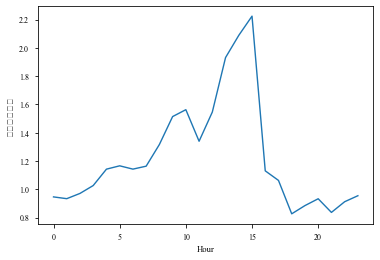

In [32]:
sns.lineplot(x=datap.Hour,y=datap.异戊二烯浓度)

C:\Users\aa271\AppData\Local\Temp\ipykernel_24388\2544450526.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()


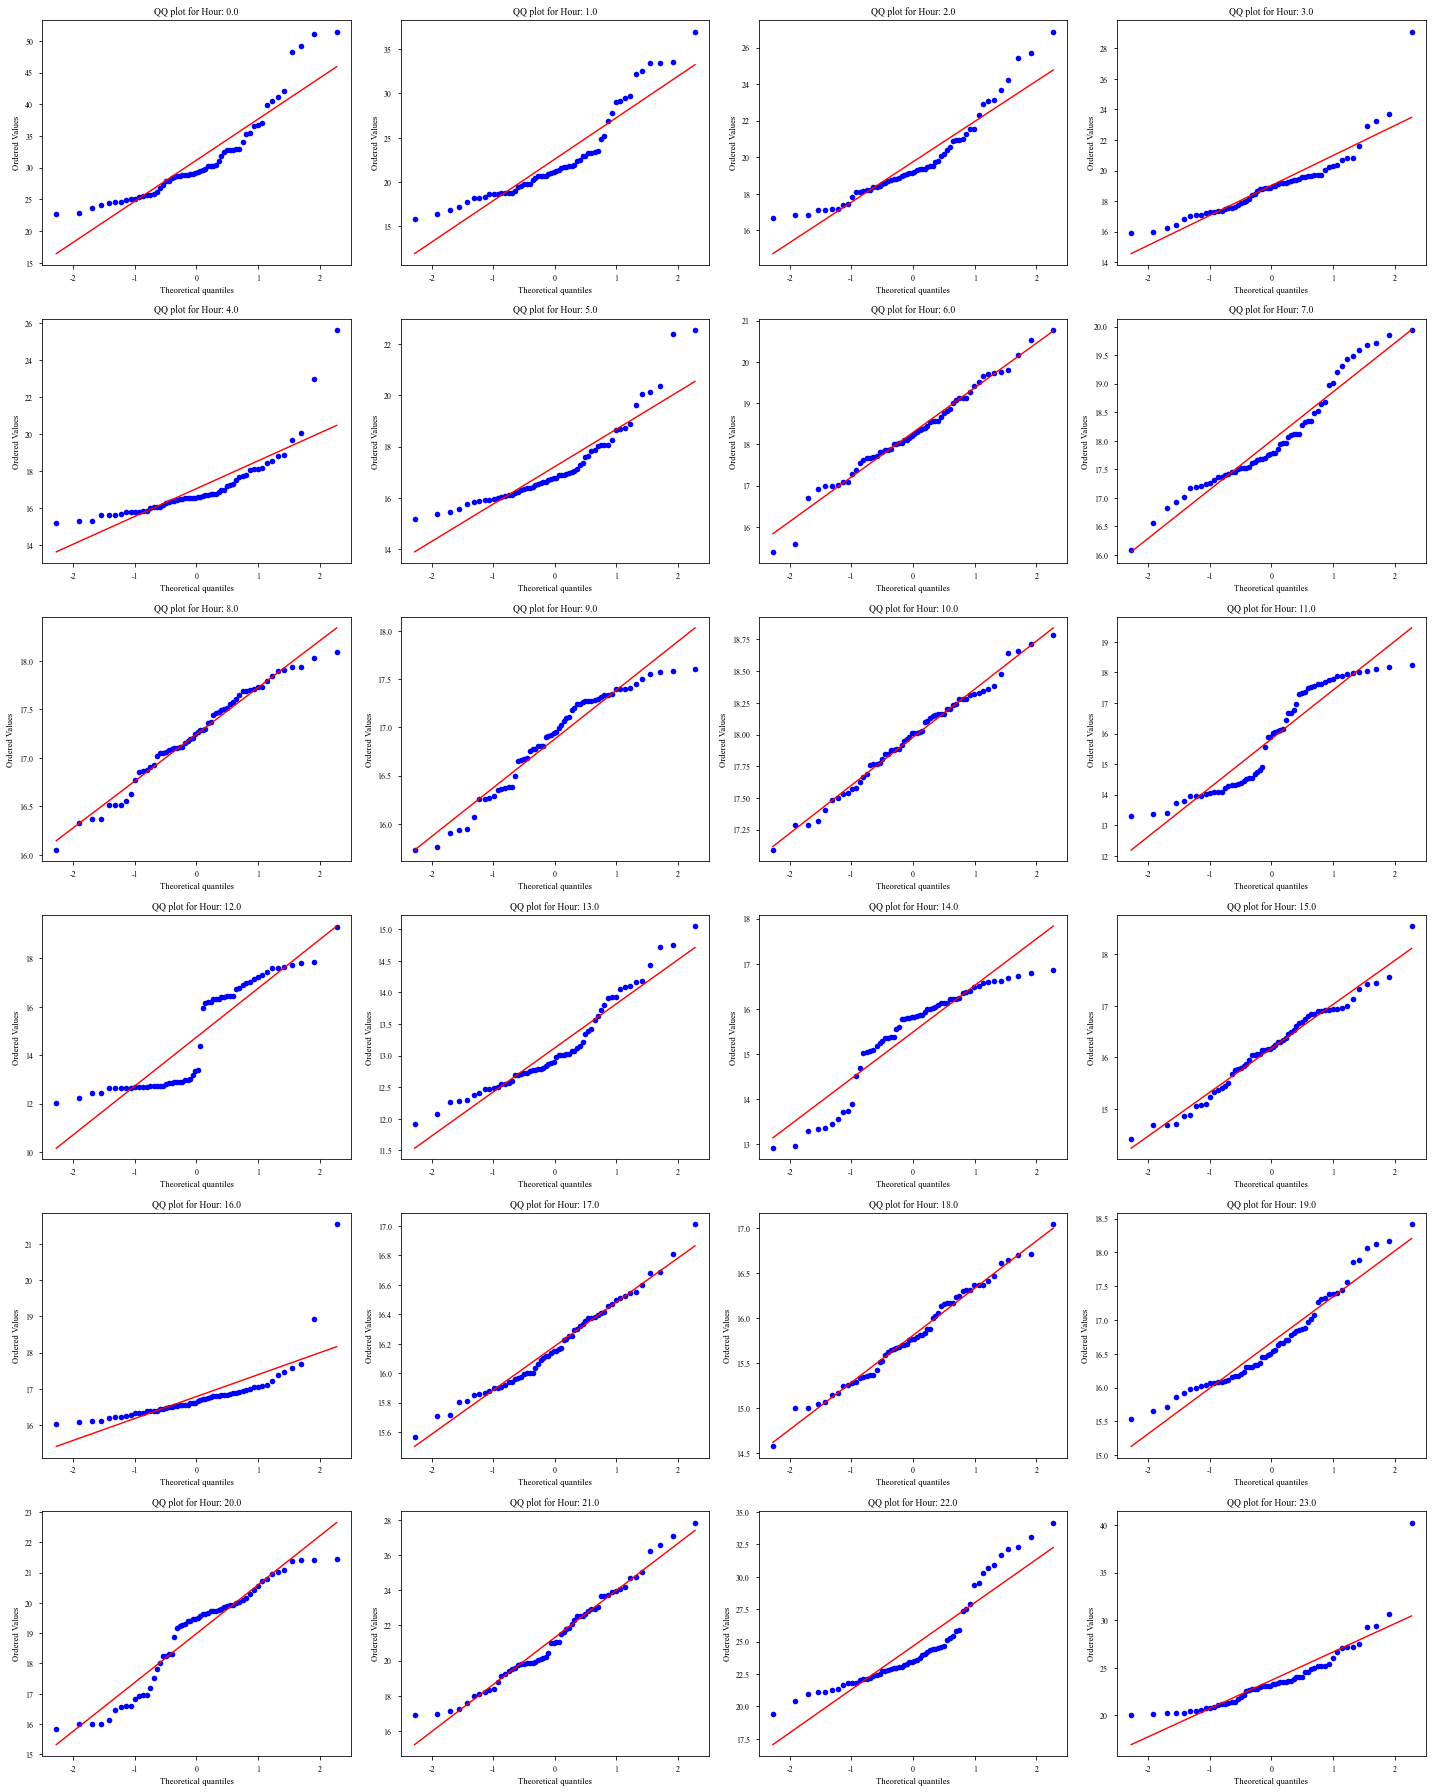

In [48]:
from scipy.stats import probplot, shapiro, anderson, kstest
def plot_qq_for_normal(data, hour, ax):
    # QQ plot for normal distribution
    probplot(data, dist="norm", plot=ax)
    ax.set_title(f"QQ plot for Hour: {hour}")

# Create a 6x4 grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 25))

# Flatten axes for easy indexing
flat_axes = axes.flatten()

data=datajh[(datajh["Season"]=="Summer")].groupby("Hour_Min").mean()
# Group data by hour
grouped_by_hour = data.groupby('Hour')

for ax, (hour, group) in zip(flat_axes, grouped_by_hour):
    data = group['PM1']
    plot_qq_for_normal(data, hour, ax)

plt.tight_layout()
fig.savefig(f"QQ PLOT.png", bbox_inches='tight',dpi=600)
plt.show()

In [75]:
normality_df

,Hour,Mean,Standard Deviation,P-Value,Is Normal
0,0.0,2.250556,0.680973,0.153821,True
1,1.0,2.245497,0.648738,0.534107,True
2,2.0,1.979302,0.612007,0.033751,False
3,3.0,2.098911,0.617931,0.016679,False
4,4.0,2.126036,0.613769,0.462701,True
5,5.0,2.005849,0.609305,0.238253,True
6,6.0,1.683503,0.550258,0.298001,True
7,7.0,1.733672,0.545158,0.868672,True
8,8.0,1.515331,0.453682,0.498406,True
9,9.0,1.45717,0.485395,0.005398,False


<AxesSubplot: xlabel='Mean', ylabel='Density'>

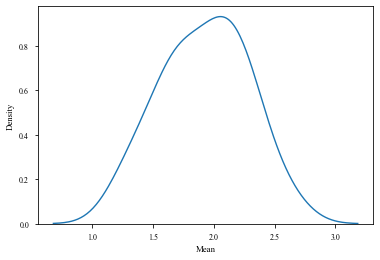

In [74]:
sns.kdeplot(normality_df["Mean"])

<AxesSubplot: xlabel='异戊二烯浓度', ylabel='Density'>

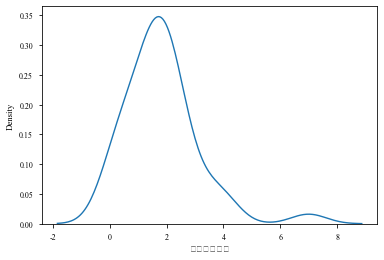

In [72]:
sns.kdeplot(datajh[(datajh["Hour_Min"]=="12:00") * (datajh["异戊二烯浓度"]!=0)]["异戊二烯浓度"])

<AxesSubplot: xlabel='Hour', ylabel='异戊二烯浓度'>

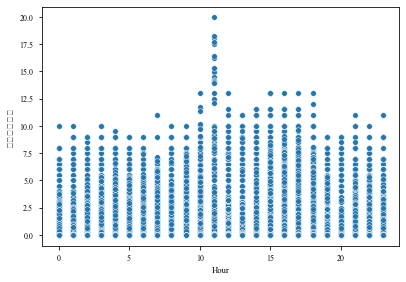

In [268]:
sns.scatterplot(x=datajh.Hour,y=datajh.异戊二烯浓度)

In [85]:
datajh[(datajh["Season"]=="Summer") * (datajh["异戊二烯浓度"]!=0)].groupby("Hour_Min").mean().reset_index()

,Hour_Min,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,O3,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,TVOCs,Hour,Day,seconds
0,00:00,0.312500,3.250000,0.0,0.062500,1.031250,0.750000,0.243750,4.437500,0.250000,...,14.390694,11.631111,600.000000,-0.400000,30.900000,78.400000,42.012500,0.0,6.000000,26.375000
1,00:01,0.222222,2.476667,0.0,0.213333,0.895556,0.333333,0.302222,3.968889,0.166667,...,11.681278,10.445026,720.944444,-0.365375,30.436528,79.101389,39.055556,0.0,10.444444,85.777778
2,00:02,0.300000,2.800000,0.0,0.000000,1.230000,1.000000,0.300000,4.900000,0.500000,...,15.028000,11.709500,270.000000,-0.400000,30.900000,78.400000,40.330000,0.0,6.000000,150.800000
3,00:03,0.277778,1.366667,0.0,0.263333,0.801111,0.895556,0.450000,3.531111,0.000000,...,12.775963,10.426765,404.666667,-0.359185,30.437160,79.127162,37.015556,0.0,10.444444,207.888889
4,00:04,0.642857,2.357143,0.0,0.000000,0.478571,0.500000,0.221429,3.357143,0.428571,...,16.375000,11.970000,600.000000,-1.350000,30.900000,78.500000,41.471429,0.0,6.000000,267.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,0.112222,1.843333,0.0,0.285000,0.878889,0.630000,0.336667,3.060556,0.166667,...,12.688602,10.519065,645.444444,-0.364222,30.518148,78.481481,40.033333,23.0,9.444444,86131.111111
1436,23:56,0.368500,1.943500,0.0,0.220500,0.609000,0.302000,0.341000,2.192000,0.100000,...,13.366222,10.799133,351.733333,-0.372267,30.564889,78.388889,37.293000,23.0,9.000000,86191.700000
1437,23:57,0.125000,1.467500,0.0,0.434375,0.814375,0.790625,0.231250,2.418750,0.062500,...,12.463125,10.548578,428.000000,-0.363844,30.455000,78.621877,34.965625,23.0,10.000000,86259.250000
1438,23:58,0.690385,1.943077,0.0,0.510769,0.804231,0.788846,0.348462,2.284615,0.307692,...,10.173718,9.702265,866.153846,-0.346581,30.159829,79.142737,35.920769,23.0,12.692308,86305.692308


C:\Users\aa271\AppData\Local\Temp\ipykernel_24388\1097850000.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index()


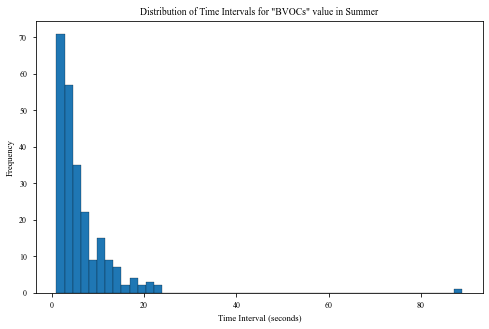

In [62]:
# Modify the code based on user's request

# Extract data for the summer season

data=datajh[(datajh["Season"]=="Summer") ].groupby(["Hour_Min"]).mean().reset_index()
data_summer =data
# data_summer = datajh[(datajh["Season"]=="Summer")* (datajh["Hour"]==8)]
# Find the times when "异戊二烯浓度" is zero
zero_times_summer = data_summer[(data_summer["异戊二烯浓度"] <= data_summer["异戊二烯浓度"].mean()+0.1)*(data_summer["异戊二烯浓度"] >= data_summer["异戊二烯浓度"].mean()-0.1)]["Hour_Min"]
zero_times_summer = pd.to_datetime(zero_times_summer)
# Calculate the differences between each "zero" time and the previous "zero" time
differences = zero_times_summer.diff().dropna()
# Filter out the differences where the months are different (i.e., the "zero" time is in a different month from the previous "zero" time)
# time_intervals_summer = differences[zero_times_summer.iloc[1:].dt.month.values == zero_times_summer.iloc[:-1].dt.month.values]
time_intervals_summer = differences

# Convert the differences to seconds
time_intervals_summer = (time_intervals_summer / pd.Timedelta(minutes=1)).astype(int)
# time_intervals_summer =time_intervals_summer /7-1
# Plot the distribution of time intervals
plt.figure(figsize=(8, 5))
time_intervals_summer.hist(bins=50, edgecolor='black')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Intervals for "BVOCs" value in Summer')
plt.grid(False)
plt.savefig(f"Value DIS.svg", bbox_inches='tight')
plt.show()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 75.30it/s]


       sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon         0.005273  2079.389323 -2551.505907     inf      0.175732   

          ks_pvalue  
expon  6.312045e-07  
{'expon': (1.0, 5.02092050209205)}


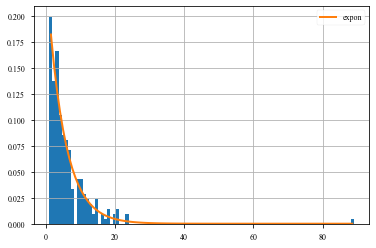

In [63]:

from fitter import Fitter # 拟合分布
f = Fitter(time_intervals_summer , distributions=['expon'])  # 创建Fitter类
f.fit()  # 调用fit函数拟合分布
print(f.summary()) # 输出拟合结果
print(f.fitted_param)
plt.savefig(f"Value DIS2.svg", bbox_inches='tight')

C:\Users\aa271\AppData\Local\Temp\ipykernel_29516\1076676349.py:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_values, pmf_values, use_line_collection=True)


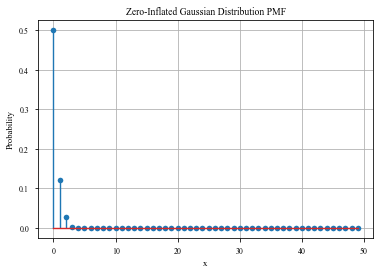

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def zero_inflated_gaussian_pmf(x, p, mu=0, sigma=1):
    """
    Compute the PMF of the zero-inflated Gaussian distribution at point x.

    Parameters:
    - x: point at which to compute the PMF
    - p: probability of zero inflation
    - mu: mean of the Gaussian distribution
    - sigma: standard deviation of the Gaussian distribution

    Returns:
    - value: PMF value at point x
    """
    if x == 0:
        return p
    else:
        return (1-p) * (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-0.5 * ((x-mu)/sigma)**2)

# Parameters
p = 0.5
mu = 0
sigma = 1

# Compute PMF values
x_values = np.arange(0, 50, 1)
pmf_values = [zero_inflated_gaussian_pmf(x, p, mu, sigma) for x in x_values]

# Plot
plt.stem(x_values, pmf_values, use_line_collection=True)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Zero-Inflated Gaussian Distribution PMF')
plt.grid(True)
plt.show()


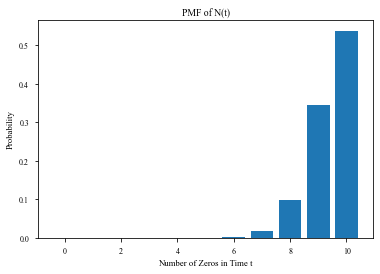

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def pmf(k, t, p, sigma):
    prob_zero_inflated = p
    prob_gaussian = (1-p) * (1/np.sqrt(2*np.pi*sigma**2))
    return comb(t, k) * (prob_zero_inflated + prob_gaussian)**k * (1 - prob_zero_inflated - prob_gaussian)**(t-k)

# 参数设置
t = 10  # 选择一个具体的时间t
p = 0.9  # 零膨胀部分的概率
sigma = 1  # 正态分布的标准差

# 计算概率质量函数
k_values = np.arange(0, t+1)
probabilities = [pmf(k, t, p, sigma) for k in k_values]

# 绘制图像
plt.bar(k_values, probabilities)
plt.xlabel('Number of Zeros in Time t')
plt.ylabel('Probability')
plt.title('PMF of N(t)')
plt.show()


In [352]:
from scipy.stats import poisson, kstest

# Fit to Poisson distribution
lambda_estimate = time_intervals_summer.mean()

# Generate poisson values for the same range as our data
poisson_values = poisson(mu=lambda_estimate).pmf(time_intervals_summer.sort_values().unique())

# Perform Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(time_intervals_summer.sort_values(), 'poisson', args=(lambda_estimate,))

lambda_estimate, ks_statistic, ks_p_value

(10.60518675455116, 0.7194223835474003, 0.0)

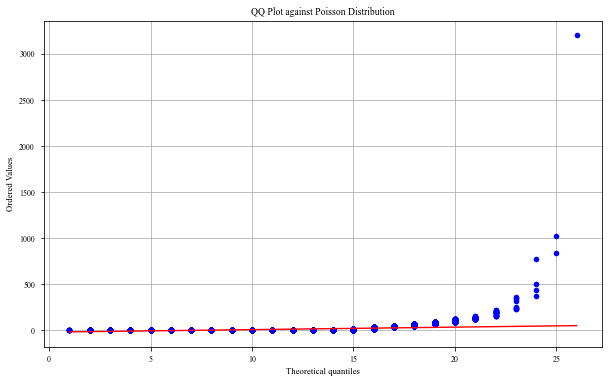

In [353]:
from scipy.stats import probplot

# Generate QQ plot
plt.figure(figsize=(10, 6))
probplot(time_intervals_summer, dist="poisson", sparams=(lambda_estimate,), plot=plt)
plt.title("QQ Plot against Poisson Distribution")
plt.grid(True)
plt.show()

In [362]:
import statsmodels.api as sm

# Prepare the data
y = time_intervals_summer.values

# As we are using the zero-inflated Poisson model, we don't need an additional X matrix for covariates.
# However, statsmodels requires one. So we'll create an intercept.
X = np.ones((len(y), 1))

# Fit the zero-inflated Poisson model
zip_model = sm.ZeroInflatedPoisson(y, X).fit()

# Print the summary of the model
print(zip_model.summary())

# Perform goodness-of-fit test
# One way to check the fit of a zero-inflated model is to compare the observed counts of zeros to the expected counts of zeros.
observed_zeros = (y == 0).sum()
expected_zeros = len(y) * zip_model.predict(X, exog_infl=X).mean()

print(f"Observed zeros: {observed_zeros}")
print(f"Expected zeros under ZIP model: {expected_zeros}")

Optimization terminated successfully.
         Current function value: 6.982037
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       y   No. Observations:                25488
Model:             ZeroInflatedPoisson   Df Residuals:                    25487
Method:                            MLE   Df Model:                            0
Date:                 Mon, 30 Oct 2023   Pseudo R-squ.:              -8.618e-07
Time:                         01:51:49   Log-Likelihood:            -1.7796e+05
converged:                        True   LL-Null:                   -1.7796e+05
Covariance Type:             nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -12.0209

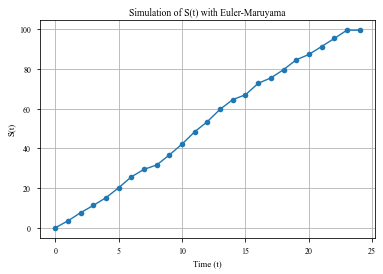

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for mu and sigma
a_mu, b_mu, c_mu = -0.01, 0.14, 0.73
d_mu, e_mu, f_mu = 0.08, -4.52, 66.85
a_sigma, b_sigma, c_sigma = 0, 0.04, 0.20
d_sigma, e_sigma, f_sigma = 0.02, -1.13, 16.69

# Define mu and sigma functions
def mu(t, T):
    return (a_mu * t**2 + b_mu * t + c_mu) + (d_mu * T**2 + e_mu * T + f_mu)

def sigma(t, T):
    return (a_sigma * t**2 + b_sigma * t + c_sigma) + (d_sigma * T**2 + e_sigma * T + f_sigma)

# Euler-Maruyama method
def simulate_SDE(T_list, S0, dt, N):
    S = np.zeros(N)
    S[0] = S0
    t_values = np.arange(0, N*dt, dt)
    for i in range(1, N):
        t = t_values[i-1]
        T = T_list[i-1]
        dW = np.sqrt(dt) * np.random.randn()
        S[i] = S[i-1] + mu(t, T) * dt + sigma(t, T) * dW
    return S


# Simulation settings
S0 = 0  # Initial value
dt = 1  # Time step
N = 25  # Number of steps
T_list = datap.地面层温度  # Example T values, you can adjust this


# Simulate and plot
S_values = simulate_SDE(T_list, S0, dt, N)
plt.plot(np.arange(0, N*dt, dt), S_values, '-o')
plt.xlabel('Time (t)')
plt.ylabel('S(t)')
plt.title('Simulation of S(t) with Euler-Maruyama')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for mu and sigma
a_mu, b_mu, c_mu = -0.1, 2, 1
d_mu, e_mu, f_mu = 0.05, -1, 2
a_sigma, b_sigma, c_sigma = -0.05, 1, 0.5
d_sigma, e_sigma, f_sigma = 0.02, -0.5, 1

# Define mu and sigma functions
def mu(t, T):
    return (a_mu * t**2 + b_mu * t + c_mu) + (d_mu * T**2 + e_mu * T + f_mu)

def sigma(t, T):
    return (a_sigma * t**2 + b_sigma * t + c_sigma) + (d_sigma * T**2 + e_sigma * T + f_sigma)

# Euler-Maruyama method
def simulate_SDE(T_list, S0, dt, N):
    S = np.zeros(N)
    S[0] = S0
    t_values = np.arange(0, N*dt, dt)
    for i in range(1, N):
        t = t_values[i-1]
        T = T_list[i-1]
        dW = np.sqrt(dt) * np.random.randn()
        S[i] = S[i-1] + mu(t, T) * dt + sigma(t, T) * dW
    return S

# Simulation settings
S0 = 0
dt = 1
N = 25
T_list = np.linspace(5, 15, N)  # Example T values, you can adjust this
num_simulations = 1000

# Multiple simulations
results = np.zeros((num_simulations, N))
for i in range(num_simulations):
    results[i] = simulate_SDE(T_list, S0, dt, N)

# Plot histograms for each time step
for j in range(N):
    plt.figure()
    plt.hist(results[:, j], bins=30, density=True)
    plt.title(f'Distribution of S(t) at t={j*dt}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [136]:
normality_df

,Hour,Mean,Standard Deviation,P-Value,Is Normal
0,0.0,0.945848,0.264721,0.109516,True
1,1.0,0.933328,0.283671,0.603525,True
2,2.0,0.970541,0.238164,0.81277,True
3,3.0,1.026252,0.299194,0.418038,True
4,4.0,1.142082,0.310944,0.235605,True
5,5.0,1.165675,0.319712,0.275868,True
6,6.0,1.142301,0.336252,0.890598,True
7,7.0,1.163111,0.292649,0.013747,False
8,8.0,1.31641,0.328101,0.635181,True
9,9.0,1.513905,0.411373,0.9618,True


In [180]:
np.random.randn()

0.0037734390789867745

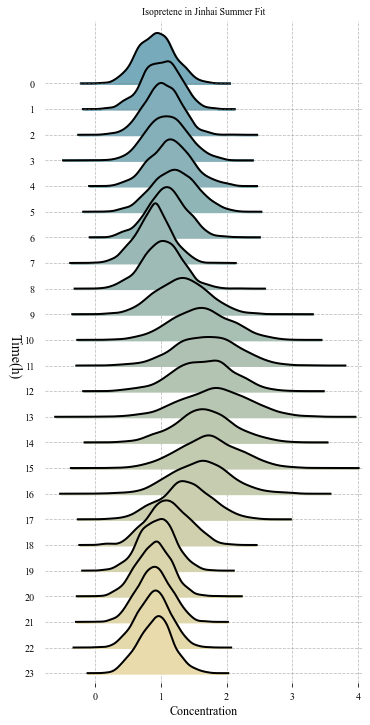

In [64]:
# 定义参数
# Parameters for mu and sigma
a_mu, b_mu, c_mu = list(np.poly1d(coeff_t))
d_mu, e_mu, f_mu =  list(np.poly1d(coeff_T))
a_sigma, b_sigma, c_sigma = list(np.poly1d(coeff_t2))
d_sigma, e_sigma, f_sigma = list(np.poly1d(coeff_T2))

dt = 1
times = np.arange(0, 24, dt)
T_values = datap.地面层温度




# Euler-Maruyama方法模拟SDE
# def simulate_path():
#     S = np.zeros_like(times)
#     S[0] = 0
#     for i in range(1, len(times)):
#         t = times[i]
#         T = T_values[i]
#         mu = a_mu*t**2 + b_mu*t + c_mu + d_mu*T**2 + e_mu*T + f_mu
#         sigma = a_sigma*t**2 + b_sigma*t + c_sigma + d_sigma*T**2 + e_sigma*T + f_sigma
#         S[i] = S[i-1] + mu *dt + sigma*np.sqrt(dt)*np.random.randn()
#     return S

def simulate_path():
    S = []
    for i in range(0, len(times)):
        t = times[i]
        T = T_values[i]
        mu = d_mu*T**2 + e_mu*T + f_mu
        sigma = d_sigma*T**2 + e_sigma*T + f_sigma
        S.append(np.random.normal(mu, sigma, 1)[0])
    return S

n_simulations = 1000
# 模拟多次并转换为DataFrame
data_list = []
i=0
for _ in range(n_simulations):
    path = simulate_path()
    for t, s in zip(times, path):
        data_list.append({'Hour': t, 'BVOCs': s,"group":i})
    i+=1

data = pd.DataFrame(data_list)


fig, axes = joypy.joyplot(data,
    by="Hour",
    column="BVOCs", range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")

# 设置 Y 轴标签为 'Concentration' 并调整网格样式
for i,ax in enumerate(axes):
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 设置网格样式

# 设置总的 Y 轴标签
fig.text(-0.018, 0.5, 'Time(h)', va='center', rotation=270, fontsize=14)

# 设置 X 轴标签为 'Time'
axes[-1].set_xlabel('Concentration', fontsize=12)  # 只需在最后一个轴上设置 X 轴标签



fig.savefig(f"Jinhai Ditribution Fit.svg", bbox_inches='tight')
plt.show()

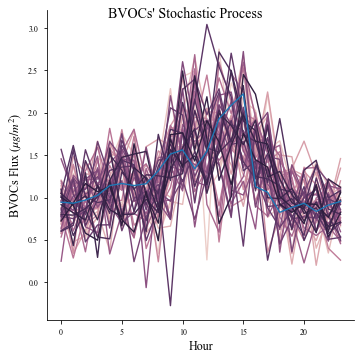

In [251]:
import seaborn as sns


n_simulations = 50
# 模拟多次并转换为DataFrame
data_list = []
i=0
for _ in range(n_simulations):
    path = simulate_path()
    for t, s in zip(times, path):
        data_list.append({'Hour': t, 'BVOCs': s,"group":i})
    i+=1

data = pd.DataFrame(data_list)

# Plot the lines on two facets
g = sns.relplot(x="Hour", y="BVOCs",
                hue="group", facet_kws=dict(sharex=False),
                kind="line", data=data,
    legend=False)
sns.lineplot(x=datap.Hour,y=datap.异戊二烯浓度)
# Set the title
g.fig.suptitle("BVOCs' Stochastic Process",fontsize=14)

# Set the y-axis label
g.axes[0, 0].set_ylabel("BVOCs Flux ($μg/m^2$)",fontsize=12)
g.axes[0, 0].set_xlabel("Hour",fontsize=12)

plt.savefig(f"BVOCs' Stochastic Process Fit.svg", bbox_inches='tight')